In [1]:
import cvxpy as cp
import numpy as np
import pylab as pl

In [2]:
SEED = 200
# Generates 2D data that is largely linearly separable, but overlaps slightly
def gen_lin_separable_overlap_data(n):
    np.random.seed(SEED)
    mean1 = np.array([1, -1])
    mean2 = np.array([-1, 1])
    cov = np.array([[1.5, 1.0], [1.0, 1.5]])
    X1 = np.random.multivariate_normal(mean1, cov, (n//2))
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, (n//2))
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

In [3]:
class Classifier():

    def __init__(self):
        self.w = 0
        self.b = 0
        self.support_vectors = []

def plot_margin(X1_train, X2_train, clf):
    def f(x, w, b, c=0):
        # given x, return y such that [x,y] in on the line
        # w.x + b = c
        return (-float(w[0]) * x - b + c) / float(w[1])

    pl.plot(X1_train[:,0], X1_train[:,1], "ro", label="Class +1")
    pl.plot(X2_train[:,0], X2_train[:,1], "bo", label="Class -1")
    #pl.scatter(clf.support_vectors[:,0], clf.support_vectors[:,1], s=100, c="g")

    # w.x + b = 0
    a0 = -5; a1 = f(a0, clf.w, clf.b)
    b0 = 5; b1 = f(b0, clf.w, clf.b)
    pl.plot([a0,b0], [a1,b1], "k")

    # w.x + b = 1
    a0 = -5; a1 = f(a0, clf.w, clf.b, 1)
    b0 = 5; b1 = f(b0, clf.w, clf.b, 1)
    pl.plot([a0,b0], [a1,b1], "k--")

    # w.x + b = -1
    a0 = -5; a1 = f(a0, clf.w, clf.b, -1)
    b0 = 5; b1 = f(b0, clf.w, clf.b, -1)
    pl.plot([a0,b0], [a1,b1], "k--")

    pl.xlabel('x1')
    pl.ylabel('x2')

    pl.show()

In [4]:
x1, y1, x2, y2 = gen_lin_separable_overlap_data(40)
X = np.vstack((x1, x2))
Y = np.hstack((y1, y2))
L = len(X)

In [5]:
class Linear():
    def __call__(self, a, b):
        x = np.array(a)
        y = np.array(b)
        y = np.transpose(y)
        return np.dot(x, y)
kernel = Linear()

In [6]:
weight = cp.Variable(len(X[0]))
slack = cp.Variable(L)
bias = cp.Variable()
C = 0.1

objective = cp.Minimize(0.5 * cp.norm(weight)**2 + C * cp.sum_entries(slack))
constraints = [cp.mul_elemwise(Y, X*weight+bias)-1+slack >= 0, slack >= 0]

prob = cp.Problem(objective, constraints)
prob.solve()
clf = Classifier()
clf.w = weight.value
clf.b = bias.value

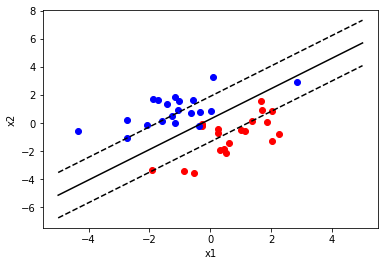

In [7]:
plot_margin(X[Y==1], X[Y==-1], clf)